# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Empirical-quantities" data-toc-modified-id="Empirical-quantities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Empirical quantities</a></div><div class="lev2 toc-item"><a href="#Summary" data-toc-modified-id="Summary-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summary</a></div><div class="lev2 toc-item"><a href="#import-packages" data-toc-modified-id="import-packages-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>import packages</a></div><div class="lev2 toc-item"><a href="#Set-up" data-toc-modified-id="Set-up-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Set-up</a></div><div class="lev2 toc-item"><a href="#Digging-in" data-toc-modified-id="Digging-in-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Digging in</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Conclusion</a></div><div class="lev1 toc-item"><a href="#Estimating-$\mathrm{Var}(\langle-S_\lambda(z),-z\rangle)$" data-toc-modified-id="Estimating-$\mathrm{Var}(\langle-S_\lambda(z),-z\rangle)$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimating <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-175"><span class="MJXp-mrow" id="MJXp-Span-176"><span class="MJXp-mi" id="MJXp-Span-177">V</span><span class="MJXp-mi" id="MJXp-Span-178">a</span><span class="MJXp-mi" id="MJXp-Span-179">r</span></span><span class="MJXp-mo" id="MJXp-Span-180" style="margin-left: 0em; margin-right: 0em;">(</span><span class="MJXp-mo" id="MJXp-Span-181" style="margin-left: 0em; margin-right: 0em;">⟨</span><span class="MJXp-msubsup" id="MJXp-Span-182"><span class="MJXp-mi MJXp-italic" id="MJXp-Span-183" style="margin-right: 0.05em;">S</span><span class="MJXp-mi MJXp-italic MJXp-script" id="MJXp-Span-184" style="vertical-align: -0.4em;">λ</span></span><span class="MJXp-mo" id="MJXp-Span-185" style="margin-left: 0em; margin-right: 0em;">(</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-186">z</span><span class="MJXp-mo" id="MJXp-Span-187" style="margin-left: 0em; margin-right: 0em;">)</span><span class="MJXp-mo" id="MJXp-Span-188" style="margin-left: 0em; margin-right: 0.222em;">,</span><span class="MJXp-mi MJXp-italic" id="MJXp-Span-189">z</span><span class="MJXp-mo" id="MJXp-Span-190" style="margin-left: 0em; margin-right: 0em;">⟩</span><span class="MJXp-mo" id="MJXp-Span-191" style="margin-left: 0em; margin-right: 0em;">)</span></span></span><script type="math/tex" id="MathJax-Element-18">\mathrm{Var}(\langle S_\lambda(z), z\rangle)</script></a></div><div class="lev1 toc-item"><a href="#Computing-$\Psi_1$-norm-of-threshold-product" data-toc-modified-id="Computing-$\Psi_1$-norm-of-threshold-product-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Computing <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-192"><span class="MJXp-msubsup" id="MJXp-Span-193"><span class="MJXp-mi" id="MJXp-Span-194" style="margin-right: 0.05em;">Ψ</span><span class="MJXp-mn MJXp-script" id="MJXp-Span-195" style="vertical-align: -0.4em;">1</span></span></span></span><script type="math/tex" id="MathJax-Element-19">\Psi_1</script>-norm of threshold product</a></div><div class="lev1 toc-item"><a href="#Baby-numerics" data-toc-modified-id="Baby-numerics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Baby numerics</a></div>

# Empirical quantities

## Summary

We really want to determine what values of $\lambda = \lambda(N)$ admit
$$ \langle S_\lambda(z), z\rangle \geq \sqrt N $$
in the sense that we want to find a function for $\lambda$ in terms of $N$. 

## import packages

In [1]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


## Set-up

We have a "guess" for $\lambda$:
$$
\lambda_\varepsilon(N) = \sqrt{(1+\varepsilon)\log(N)}
$$

In [2]:
def lambda_of_N(N, epsilon=.01):
    return np.sqrt((1+epsilon) * np.log(N))

In [3]:
def softThresh(x, lam):
    return np.sign(x) * np.maximum(0, np.abs(x)-lam)

**A note on `np.einsum`:**  
For a matrix $A$ with columns $[a_1, a_2, a_3, \ldots, a_k]$, where $a_j \in \mathbb{R}^N$, the operation
```python
np.einsum('i...,...i', A, A.T)
```
returns the vector $( \langle a_1, a_1\rangle, \ldots, \langle a_k, a_k\rangle ) \in \mathbb{R}^k$.

In [4]:
N = 10000
k = 1000
epsilon = .01
Z = np.random.randn(N, k)
Sz = softThresh(Z, lambda_of_N(N, epsilon))
threshold_product = np.einsum('i...,...i', Sz, Z.T)
print('The threshold product was greater than sqrt(N) {} % of the time.'.format(round((threshold_product >= np.sqrt(N)).sum()/k*100, 3)))

The threshold product was greater than sqrt(N) 0.0 % of the time.


## Digging in

Choosing $\varepsilon = .1$ actually really doesn't work all that well: only ~2% of the sample actually satisfied the cut-off. Let's dig in our heels a little deeper. We'll test the function for a variety of different choices of $\varepsilon$ and see what works best. 

In [5]:
def proportion_of_threshold_above_rootN(N=100, k=1000, epsilon=0):
    Z = np.random.randn(N, k)
    Sz = softThresh(Z, lambda_of_N(N, epsilon))
    threshold_product = np.einsum('i...,...i', Sz, Z.T)
    return (threshold_product >= np.sqrt(N)).sum()/k

In [6]:
epsilon_range = np.linspace(-.75, .75, 1001)
proportion_above_for_epsilon_range = [proportion_of_threshold_above_rootN(N, 100, epsilon) for epsilon in epsilon_range]

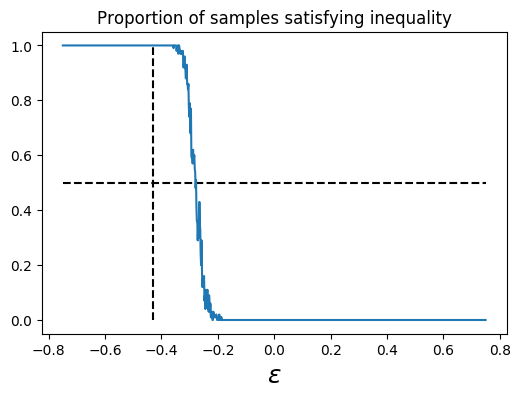

In [7]:
plt.plot(epsilon_range, proportion_above_for_epsilon_range);
plt.xlabel('$\\varepsilon$', size=18);
plt.title('Proportion of samples satisfying inequality');
plt.hlines(.5, -.75, .75, linestyles='dashed');
plt.vlines(-.43, 0, 1, linestyles='dashed');

## Conclusion

If we want to choose $\lambda(N) = \sqrt{(1+\varepsilon)\log(N)}$ and have the inequality $\langle S_\lambda(z), z\rangle \geq \sqrt{N}$ hold with even moderate probability ($\mathbb{P}(\cdots) \geq 0.5$), then we need to choose $\varepsilon \lesssim -0.43$ &mdash; *i.e.*, 
$$
\lambda(N) = \sqrt{C\log(N)}, \quad C \lesssim 0.75
$$

# Estimating $\mathrm{Var}(\langle S_\lambda(z), z\rangle)$

In [14]:
def variance_thresholdProduct(N, sampleSize, epsilon):
    """
    Assume lambda = lambda(epsilon) where 
      lambda(epsilon) = sqrt( (1 - epsilon) * log(N) )
    Note: var(X) = var(X - E(X))
    """
    if epsilon < 0:
        epsilon = 0
    elif epsilon > .5:
        epsilon = .5
    lam = np.sqrt((1-epsilon) * np.log(N))
    Z = np.random.randn(N, sampleSize)
    Sz = softThresh(Z, lam)
    threshold_product = np.einsum('i...,...i', Sz, Z.T)
    return np.var(threshold_product - 2 * N * norm.cdf(-lam))

In [51]:
K = 250
N_vec = np.logspace(1, 5, 10).astype(np.int)
epsilon_vec = np.linspace(0, .5, 20)
variance_of_threshold_product = np.zeros((epsilon_vec.size, N_vec.size))
print()
for j, epsilon in enumerate(epsilon_vec):
    print('\r{} of {}.'.format(j+1, epsilon_vec.size), end='')
    for k, N in enumerate(N_vec):
        variance_of_threshold_product[j, k] = variance_thresholdProduct(N, K, epsilon)/N


20 of 20.

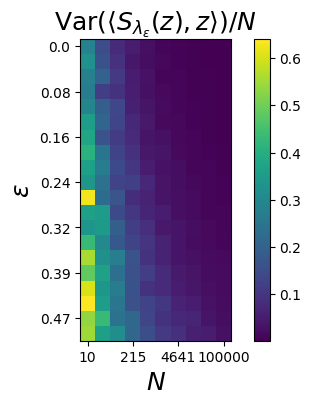

In [52]:
ax = plt.subplot(111);
I = ax.imshow(variance_of_threshold_product);
ax.set_xticks(range(0, 10, 3));
ax.set_xticklabels(N_vec[::3]);
ax.set_yticks(range(0, 20, 3));
ax.set_yticklabels(np.round(epsilon_vec[::3], 2));
ax.set_xlabel('$N$', size=18);
ax.set_ylabel('$\\epsilon$', size=18);
ax.set_title('$\\mathrm{Var}(\\langle S_{\\lambda_\\varepsilon} (z), z\\rangle)/N$', size=18);
plt.colorbar(I);

# Computing $\Psi_1$-norm of threshold product

First is the threshold product monotonic in $z$? 

In [ ]:
def PsiOneNorm()

# Baby numerics

In [50]:
def threshold_product_approximation_quality(N=100, k=1000, lam_factor=1):
    lam = np.sqrt(lam_factor * np.log(N))
    Z = np.random.randn(N, k)
    Sz = softThresh(Z, lam)
    thProd = np.einsum('i...,...i', Sz, Z.T)
    return thProd.mean() - 2*N*norm.cdf(-lam)

In [57]:
lam_factor_vector = np.linspace(.75, 2, 301)
thProd_approxQuality = [[threshold_product_approximation_quality(lam_factor=lam_fac) for lam_fac in lam_factor_vector] for _ in range(10)]

In [61]:
thProd_approxQuality = np.array(thProd_approxQuality)

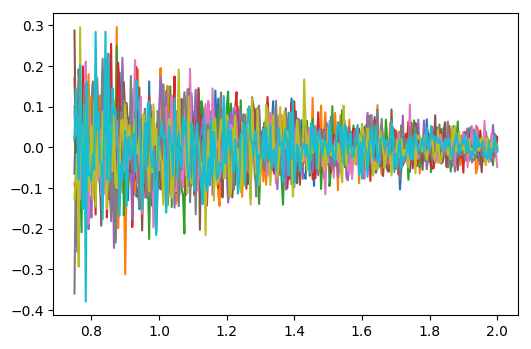

In [64]:
plt.plot(lam_factor_vector, thProd_approxQuality.T);

Pretty noisy...

In [53]:
import pandas as pd

In [66]:
thProdApproxQuality = pd.DataFrame(thProd_approxQuality.T, index=lam_factor_vector)

In [67]:
thProdApproxQuality.head()

,0,1,2,3,4,5,6,7,8,9
0.750000,-0.064554,0.100053,0.022099,0.168650,-0.088115,0.286549,0.086526,-0.359292,-0.126030,0.021522
0.754167,0.086508,-0.015458,-0.018089,0.049315,-0.120870,-0.035797,0.032207,-0.017598,-0.074905,0.145468
0.758333,-0.172661,-0.041754,-0.183553,-0.048640,-0.256709,-0.143240,0.030776,-0.045679,-0.014985,0.038357
0.762500,-0.015970,0.162688,-0.044089,0.116800,-0.081002,0.191691,0.070799,-0.091300,-0.293276,-0.078584
0.766667,-0.097340,0.056831,-0.061384,0.014718,-0.100244,0.095431,-0.128203,0.023350,0.294582,0.201494


In [68]:
thProd_rolling = thProdApproxQuality.rolling(15, center=True).agg(['mean', 'std'])

In [74]:
thProd_rolling.columns.ravel()

array([(0, 'mean'), (0, 'std'), (1, 'mean'), (1, 'std'), (2, 'mean'),
       (2, 'std'), (3, 'mean'), (3, 'std'), (4, 'mean'), (4, 'std'),
       (5, 'mean'), (5, 'std'), (6, 'mean'), (6, 'std'), (7, 'mean'),
       (7, 'std'), (8, 'mean'), (8, 'std'), (9, 'mean'), (9, 'std')], dtype=object)

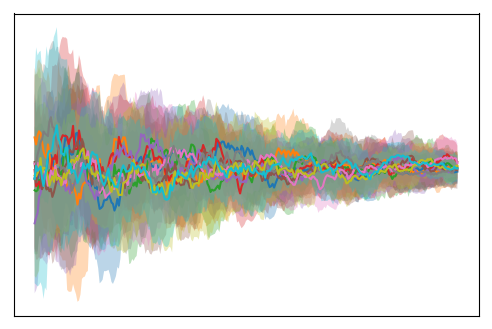

In [84]:
ax = plt.subplot('111');
for j in range(10):
    ax.plot(thProd_rolling[(j, 'mean')]);
    ax.fill_between(thProd_rolling.index, 
                     thProd_rolling[(j, 'mean')]-thProd_rolling[(j, 'std')], 
                     thProd_rolling[(j, 'mean')] + thProd_rolling[(j, 'std')], 
                     alpha=.3);
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)